<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework3_part1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.1 (32 points)

**Learning objectives:**

In this assignment, we will delve into methods for classification.  We will explore:

*   ROC curves
*   Linear discriminant analysis


---

## Part 0
Load the same libraries that we used in previous homeworks.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

We'll also briefly introduce the `pandas` package here.  `pandas` includes powerful functionality for more complex data structures that is used widely for data science applications

*   `import pandas as pd`

As always, now is also a good time to set the default font size to 16.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



---
## Part 1 (2 points)
*   Load the Fisher's Iris dataset.  This famous dataset includes measurements from three related species of flowers. These data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/FishersIris.csv

*    To do this, use the pandas function `pd.read_csv` to create a a `pandas` DataFrame

In [ ]:
data

Let's explore this object using some common `pandas` methods.

*   Use the `head` method to display the data in the first 5 entries of `df`.

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*   Use the `describe` method to display some summary statistics for the DataFrame object you created.

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*   Use the `info` method to display some additional information about the DataFrame object you created.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


---
## Part 2 (2 points)
While pandas dataframes can be very handy in many advanced applications, we don't need their functionality here.  Instead, create some numpy arrays for easy access to the data contained in `df`.  You can access columns of data in a dataframe by their column label.  For example, `df['sepallength']` returns the first column of the dataframe.

*   Create a numpy array called `sl` containing sepal length measurements.
*   Create a numpy array called `sw` containing sepal width meaasurements.
*   Create a numpy array called `species` that contains the species from which the above measurements were taken.
*   Create a numpy array called `snum` in which the three species names in `species` are converted into the numbers 0, 1, and 2 (i.e. `0` for *Iris setosa*, `1` for *Iris versicolor*, etc.).  `np.unique` is a useful function for this application (examine the optional output arguments).

Familiarize yourself with the organization of these variables.  We'll use them throughout.

*   Finally, plot `sl`, `sw`, and `snum`.

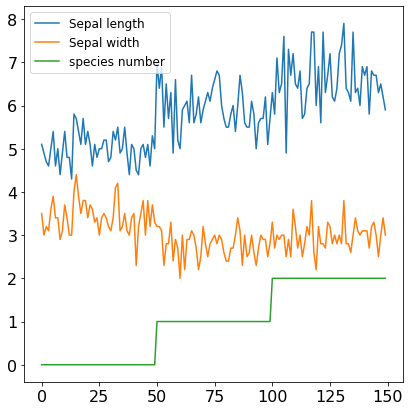

---
## Part 3 (2 points)

Plot histograms of sepal length and sepal width for *Iris setosa* and *Iris versicolor* as shown below using the numpy arrays we created.

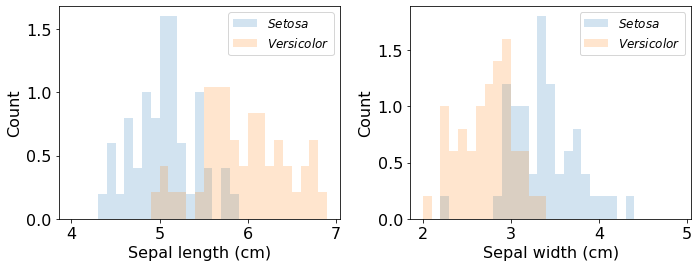

---
## Part 4 (2 points)

Let's see how discriminable *Iris setosa* and *Iris versicolor* are based on sepal length or based on sepal width using ROC curves.  

*   Write a function called `ROC` for calculating the quantities we need to create an ROC curve.

This function should be structured as follows:

**Inputs**  
`data`: a numpy array containing the measurements upon which classification is based.

`group`: a numpy array the same size as `data` containing 0's for entries in `data` associated with class 0 (i.e. *setosa*) and 1's for entries in `data` associated with class 1 (*versicolor*).

**Outputs**

`tp`: the true positive rate for each threshold.

`fp`: the false positive rate for each threshold.

`AUC`: The area under the ROC curve.

**NOTES**

(1) To calculate the above, you will first need to create a numpy array of threshold values.  These threshold values should vary between `min(data)` and `max(data)` in 50 steps.

(2) List comprehensions are an efficient method to calculate `tp` and `fp`.

(3) The numpy method `trapz` might be helpful for calculating the AUC.

---
## Part 5 (2 points)

Now let's calculate and display our ROC curves.

*   Use your `ROC` function to calculate the true positive rate, false positive rate, and AUC when sepal length or sepal width are used for classification.  Store these values.

*   Print the AUC value associated with each feature

*   On one set of axes, plot ROC curves associated with sepal length and sepal width.  Label the curves. Include the diagonal line y=x.

The area under the curve for sepal length is x.xxx
The area under the curve for sepal width is x.xxx


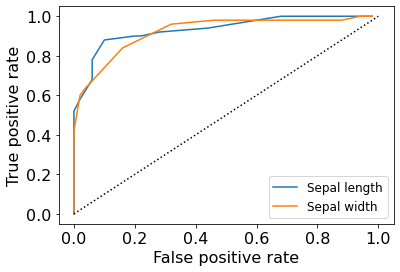

---
## Part 6 (2 points)

Let's take a look at the data in 2D.

*   Plot sepal width vs. sepal length of all specimens in the dataset.  Plot blue dots for specimens of *Iris setosa* and red dots for specimens of *Iris versicolor.*
*   Use `axis('equal')` to set the x-axis and y-axis scales to be equal.

Now, calculate the coordinates of the centroids of both groups of data. In addition, calculate the coordinates of the middle of the line connecting the centroids (the mean of the centroids).

*   Plot the loction of the centroids as large yellow dots with a line connecting them.  In addition, plot the location of the midpoint between the two centroids as a yellow 'x'.

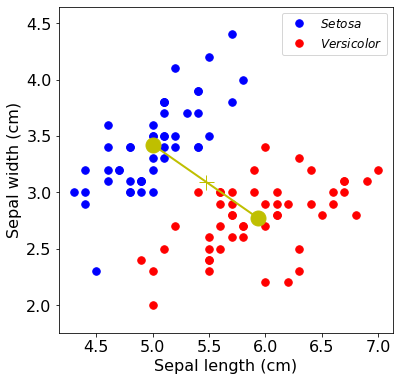

---
## Part 7 (2 points)

Now, we will use linear discriminant analysis (LDA) to classify specimens as *Iris setosa* or *Iris versicolor* in  higher dimensions (i.e. based on both sepal length and width).

LDA uses a discriminant function of the  form:

$ y(x) = W^Tx + {\omega}_0 $

where:

$ W = {\Sigma}^{-1} (\mu_2 - \mu_1) $ is the decision vector, the vector orthogonal to the decision boundary.

Importantly, ${\Sigma}^{-1}$ is the within-class covariance matrix, assumed to be the same for both classes.  To calculate ${\Sigma}^{-1}$, you must subtract the class mean from each data point before calculating the covariance matrix.

*   Plot the data after the within-class means have been subtracted.
*   Calculate $W$ as described above and print it.

We'll deal with ${\omega}_0 $ later.

The coefficients of the decision vector are xx.xxx and xx.xxx


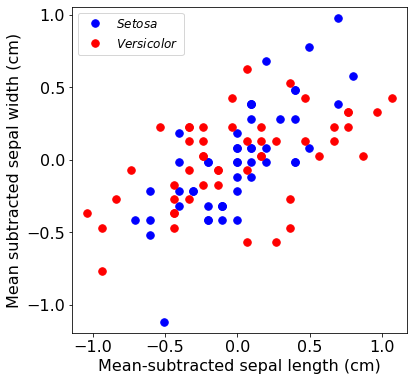

---
## Part 8 (4 points)

Let's assume that $w_0$ is chosen so that the projection of the midpoint between the two class centroids onto the decision vector is equal to zero.

Write three functions as follows:

1) A function that takes x coordinates (sepal length values; a Nx1 numpy array) as inputs and returns the y-position (sepal width values) of a line parallel to the decision vector passing through the midpoint between the class centroids.  This function will also require as input arguments the decision vector itself (1x2 numpy array) and the location of the midpoint (1x2 numpy array).

2) A function that takes x coordinates (Nx1 numpy array) as input and returns the y-position of the decision boundary under the assumption that it passes through the centroid midpoint.  This function should require the same input arguments as (1).

3) A function that takes as input data points (Nx2 numpy array), the decision vector (1x2 numpy array), and the centroid midpoint (1x2 numpy array) and returns the coordinates of the projection of the data points onto the line parallel to the decision vector passing through the centroid midpoint.

---
## Part 9 (4 points)

On a single axes, plot all of the below, as shown in the example figure.
*   The data, as in **Part 6**.
*   A line connecting the class centroids.
*   The decision boundary.
*   The line parallel to the decision vector passing through the centroid midpoint.
*   The projection of the data points onto this line as open circles.

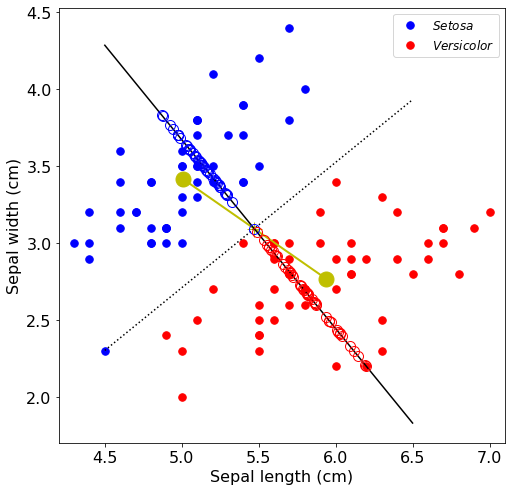

---
## Part 10 (2 points)

Write a function to calculate

$ y(x) = W^Tx + {\omega}_0 $

$y(x)$ is the distance between the decision boundary (i.e. the projection of the centroid midpoint onto the decision vector) and the projection of a data point, $x$, onto the decision vector.

This function should take as input arguments: data points ($x$; an Nx2 numpy array), the decision vector ($W$; a 1x2 numpy array), and the centroid midpoint (1x2 numpy array used to calculate $w_0$).


---
## Part 11 (2 points)

Determine the accuracy of classification of these data with LDA.

Use the function above to calculate $y(x)$ for the measurements of *Iris setosa* and *Iris versicolor*.

*   Plot histograms of $y(x)$ for *Iris setosa* and *Iris versicolor*.  
*   Plot ROC curves for classification based on (1) sepal length, (2) sepal width, and (3) $y(x)$.
*   Calculate the AUC for classification of these species using $y(x)$ and display it.

The area under the curve for LDA is 0.980


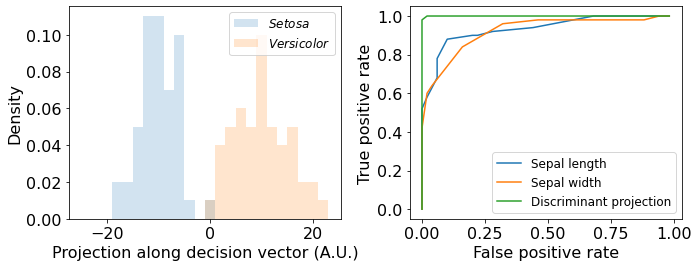

---
## Part 12 (2 points)

Now, let's apply scikit-learn's version of LDA to our classification problem and see how it compares.

Use the following code to import the `sklearn` package for LDA
*   `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis`

*   Create a `LinearDiscriminantAnalysis` object and then use its `fit` method to determine the parameters of the discriminant function.

*   Use the `decision_function` method to determine the projection of the data onto the decision vector ($y(x)$).

*   As above, plot histograms of $y(x)$ (this time calclulated with `sklearn`) on one axis and, in a second axis, ROC curves for sepal length, sepal width, $y(x)$ (your version), and $y(x)$ (`sklearn` version).

*   Calculate the AUC for classification of these species using $y(x)$ (`sklearn version`) and display it.

The area under the curve for LDA (sklearn) is 0.980


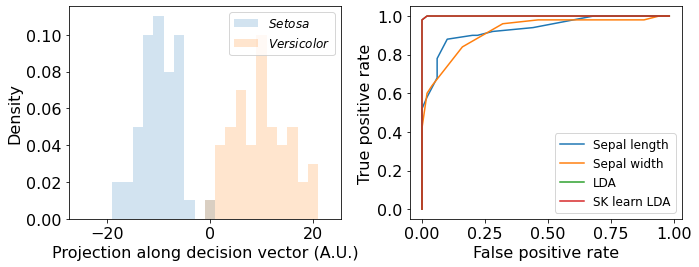


<font color='red'>**SHORT ANSWER (4 points):** Explain why the decision vector is not aligned with the vector connecting class centroids and how this relates to qualitative features of the data.  Under what conditions would they be aligned?</font>  